'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


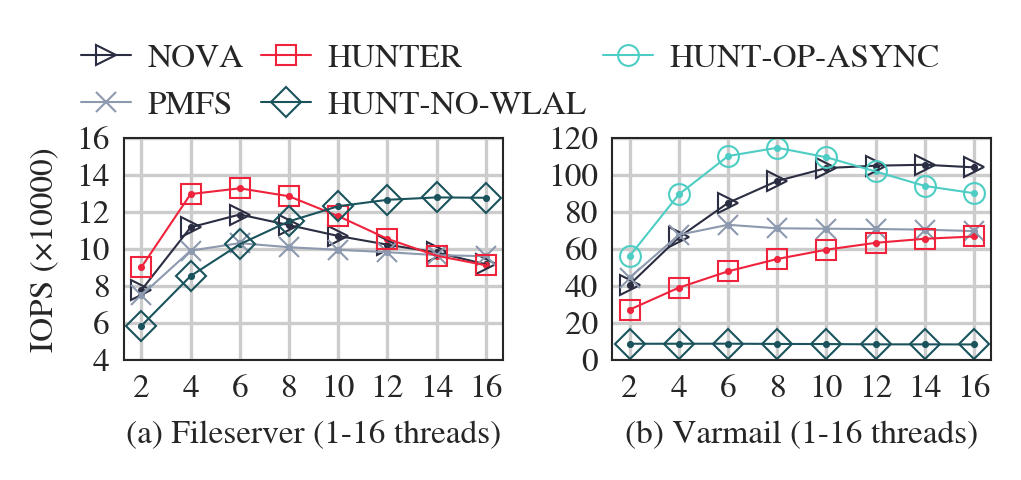

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3.5)))

line_width = 0.5
colors = ["#2b2d42", "#8d99ae", "#ef233c", "#1a535c", "#4ecdc4"]
# marks = [">", "x", "o", "s", "D"]
marks = [">", "x", "s", "D", "o"]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
x = list(range(1, 9))
num_jobs = [1, 3, 5, 7, 9, 11, 13, 15]

# bar_width = 0.2
# subfig_titles = ["(a) Non-interleaved write", "(b) Interleaved write"]
# patterns = ['///', '\\\\\\', 'XXX', '']
# # Reference: https://designbro.com/blog/inspiration/color-combinations/
# colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c"]
# files = ["./performance-comparison-table-single", "./performance-comparison-table-interleaved"]
# x = [1, 2, 3, 4, 5]
fbs = ["fileserver.f", "varmail.f"]
lines = []
for i in range(2):
    plt.subplot(1, 2, i + 1)
    fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    fb = fbs[i]
    for idx, fs in enumerate(fss):
        if fs == "HUNTER-NOSYNC" and i == 0:
            continue
        p, = plt.plot(x, df[(df['file_system'] == fs) & (df['file_bench'] == fb)]['iops'].iloc[num_jobs] / 10000, color=colors[idx], markerfacecolor='none', linewidth=line_width,label=fs, marker=marks[idx], markeredgecolor=colors[idx], markersize=5, markeredgewidth=0.5)
        plt.scatter(x, df[(df['file_system'] == fs) & (df['file_bench'] == fb)]['iops'].iloc[num_jobs] / 10000, color=colors[idx], s=0.5)
        if i == 0:
            lines.append(p)
        if i == 1 and fs == "HUNTER-NOSYNC":
            lines.append(p)
    if i == 0:
        plt.xlabel("(a) Fileserver (1-16 threads)", fontsize=8) 
        plt.yticks([4, 6, 8, 10, 12, 14, 16], fontsize=8)
        plt.ylabel('IOPS (×10000)', fontsize=8)
    else:
        plt.xlabel("(b) Varmail (1-16 threads)", fontsize=8) 
        plt.yticks([0, 20, 40, 60, 80, 100, 120], fontsize=8)
    plt.xticks(x, labels=[i + 1 for i in num_jobs], fontsize=8)
    ax = plt.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
fig.legend(lines, fss.map({
    "NOVA": "NOVA",
    "PMFS": "PMFS",
    "HUNTER": "HUNTER",
    "HUNTER-NOHISTORY": "HUNT-NO-WLAL",
    "HUNTER-NOSYNC": "HUNT-OP-ASYNC",
}), loc='center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=8, columnspacing=0.5, handletextpad=0.5, handlelength=1.5)


plt.tight_layout()
plt.savefig("./FIG-Filebench.pdf", bbox_inches='tight', pad_inches=0)
